# Session raster

Plot a raster of the activity of all neurons in a session and the mouse body speed and linearized track position. 

In [1]:
# imports
import sys
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.signal import medfilt


from myterial import amber_darker, green_dark, grey_darker, blue_darker

sys.path.append("./")
sys.path.append(r"C:\Users\Federico\Documents\GitHub\pysical_locomotion")

from data.data_utils import convolve_with_gaussian
from myterial import amber_darker, green_dark, grey_darker, blue_darker

from analysis.ephys.ephys_utils import get_recording_names, get_data, get_session_bouts, outline

save_folder = Path(r"D:\Dropbox (UCL)\Rotation_vte\Locomotion\analysis\ephys")

# print all available recordings
print(get_recording_names())


[06/06/22 09:56:43] DEBUG    DPL - Saving data and logs to logs                   ]8;id=653730;file://c:\ProgramData\Miniconda3\envs\dev\lib\site-packages\tpd\core.py\core.py]8;;\:]8;id=81557;file://c:\ProgramData\Miniconda3\envs\dev\lib\site-packages\tpd\core.py#118\118]8;;\

                    DEBUG    Saving log file to: logs\log.log                     ]8;id=619629;file://c:\ProgramData\Miniconda3\envs\dev\lib\site-packages\tpd\core.py\core.py]8;;\:]8;id=454177;file://c:\ProgramData\Miniconda3\envs\dev\lib\site-packages\tpd\core.py#119\119]8;;\

Connecting root@127.0.0.1:3306


[06/06/22 09:56:44] DEBUG    Connected to database: LOCOMOTION                 ]8;id=896616;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\data\dbase\__init__.py\__init__.py]8;;\:]8;id=884986;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\data\dbase\__init__.py#11\11]8;;\

['FC_220408_BAA1101192_hairpin' 'FC_220409_BAA1101192_hairpin'
 'FC_220410_BAA1101192_hairpin' 'FC_220411_BAA1101192_hairpin'
 'FC_220413_BAA1101192_hairpin' 'FC_220414_BAA1101192_hairpin'
 'FC_220415_BAA1101192_hairpin' 'FC_220432_BAA1101192_hairpin'
 'FC_220433_BAA1101192_hairpin' 'FC_220434_BAA1101192_hairpin'
 'FC_220435_BAA1101192_hairpin']


get data for a recording

In [15]:
REC = "FC_220432_BAA1101192_hairpin"

units, left_fl, right_fl, left_hl, right_hl, body = get_data(REC)
out_bouts = get_session_bouts(REC)
in_bouts = get_session_bouts(REC, direction="inbound")
incomplete_bouts = get_session_bouts(REC, complete="false")
in_incomplete_bouts = get_session_bouts(REC, direction="inbound", complete="false")

[06/06/22 10:36:54] INFO     Got tracking data for                          ]8;id=172273;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\ephys_utils.py\ephys_utils.py]8;;\:]8;id=77993;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\ephys_utils.py#35\35]8;;\
                             FC_220432_BAA1101192_hairpin

[06/06/22 10:36:55] INFO     Got 40 units for FC_220432_BAA1101192_hairpin  ]8;id=36389;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\ephys_utils.py\ephys_utils.py]8;;\:]8;id=495056;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\ephys_utils.py#49\49]8;;\

                    INFO     Got 38 bouts for FC_220432_BAA1101192_hairpin  ]8;id=18950;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\ephys_utils.py\ephys_utils.py]8;;\:]8;id=431837;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\ephys_utils.py#69\69]8;;\

                    INFO     Got 28 bouts for FC_220432_BAA1101192_hairpin  ]8;id=183187;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\ephys_utils.py\ephys_utils.py]8;;\:]8;id=908672;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\ephys_utils.py#69\69]8;;\

                    INFO     Got 26 bouts for FC_220432_BAA1101192_hairpin  ]8;id=446657;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\ephys_utils.py\ephys_utils.py]8;;\:]8;id=70086;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\ephys_utils.py#69\69]8;;\

                    INFO     Got 33 bouts for FC_220432_BAA1101192_hairpin  ]8;id=293473;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\ephys_utils.py\ephys_utils.py]8;;\:]8;id=975940;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\ephys_utils.py#69\69]8;;\

make plot

c:\ProgramData\Miniconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator


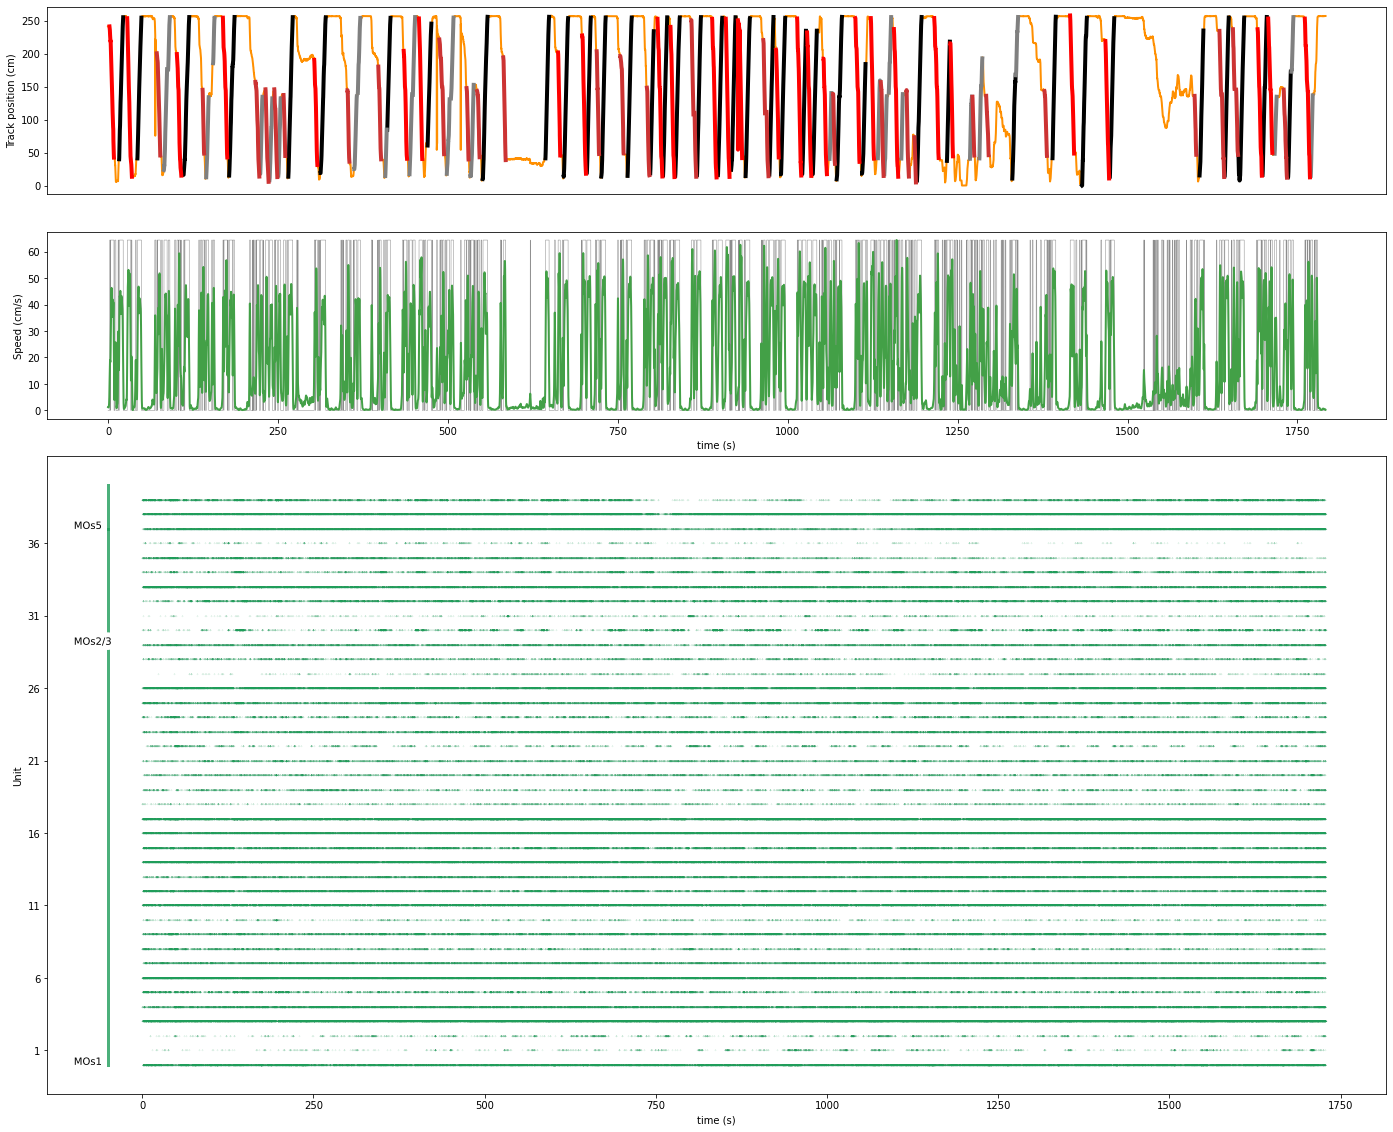

In [17]:
fig = plt.figure(figsize=(24, 20))

axes = fig.subplot_mosaic(
"""
    AAAAA
    BBBBB
    DDDDD
    DDDDD
    DDDDD
"""
)

tracking_time = np.arange(0,len(body.x+1)) / 60


# plot kinematics
axes["A"].plot(tracking_time, body.global_coord * 260, lw=2, color=amber_darker)
axes["A"].set(ylabel="Track position (cm)", xticks=[])

speed = convolve_with_gaussian(body.speed, 180)
_ =axes["B"].plot(tracking_time, medfilt(body.walking * np.max(speed), 31), lw=.5, alpha=.6, color=grey_darker)
_ =axes["B"].plot(tracking_time, speed, lw=2, color=green_dark)
_ =axes["B"].set(ylabel="Speed (cm/s)", xlabel="time (s)")

# mark bouts
for bouts, color in zip([out_bouts, incomplete_bouts, in_bouts, in_incomplete_bouts], ["k", [.5, .5, .5], 'r', [.8, .2, .2]]):
    for i, bout in bouts.iterrows():
        axes["A"].plot(
            tracking_time[bout["start_frame"]:bout["end_frame"]],
            body.global_coord[bout["start_frame"]:bout["end_frame"]] * 260,
            lw=4, color=color
        )

        # axes["D"].axvspan(
        #     bout["start_frame"] / 60,
        #     bout["end_frame"] / 60,
        #     color=color,
        #     alpha=.25
        # )




# plot spikes raster
nunits = len(units)
h = 1/nunits
# axes["D"].vlines(tracking_time[tracking.walking == 1], ymin=0, ymax=1, zorder=-1, color=grey_darker, lw=.5, alpha=.1)


regions = [ ]
last_added = 0
last_added_color = "black"
for (i, unit) in units.iterrows():
    spikes = unit.spikes_ms / 1000
    y = np.zeros_like(spikes) + (i * h)
    axes["D"].scatter(spikes, y, s=1, color=unit.color, alpha=0.1, marker=7)

    # add region as text
    if unit.brain_region not in regions:
        axes["D"].plot([-50, -50], [last_added, i * h], lw=3, color=last_added_color, alpha=0.8)
        last_added = i * h
        last_added_color = unit.color

        txt = axes["D"].text(-100, (i * h) , unit.brain_region, color="black", fontsize=10)
        outline(txt, lw=10, color="white")
        regions.append(unit.brain_region)
axes["D"].plot([-50, -50], [last_added, 1], lw=3, color=last_added_color, alpha=0.8)

_ = axes["D"].set(ylabel="Unit", xlabel="time (s)", yticklabels=np.arange(1, nunits + 1, step=5), yticks=np.arange(1, nunits + 1, step=5)/nunits)



# save figure as svg
fig.savefig(save_folder / f"{REC}_raster.png", dpi=100, bbox_inches="tight")